In [3]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets, transforms

class Generator(torch.nn.Module):
    def __init__(self):
        super(Generator, self).__init__()

        self.layer1 = nn.Sequential(
            nn.ConvTranspose2d(in_channels=100, out_channels=1024, stride=1, kernel_size=4, padding=0, bias=False),
            nn.BatchNorm2d(num_features=1024),
            nn.ReLU(inplace=True), )

        self.layer2 = nn.Sequential(
            nn.ConvTranspose2d(in_channels=1024, out_channels=512, stride=2, kernel_size=4, padding=1, bias=False),
            nn.BatchNorm2d(num_features=512),
            nn.ReLU(inplace=True), )
        self.layer3 = nn.Sequential(
            nn.ConvTranspose2d(in_channels=512, out_channels=256, stride=2, kernel_size=4, padding=1, bias=False),
            nn.BatchNorm2d(num_features=256),
            nn.ReLU(inplace=True), )
        self.layer4 = nn.Sequential(
            nn.ConvTranspose2d(in_channels=256, out_channels=128, stride=2, kernel_size=4, padding=1, bias=False),
            nn.BatchNorm2d(num_features=128),
            nn.ReLU(inplace=True), )
        self.layer5 = nn.Sequential(
            nn.ConvTranspose2d(in_channels=128, out_channels=3, stride=2, kernel_size=4, padding=1, bias=False),
            nn.Tanh())

        # self.fc1 = torch.nn.Linear(512, 1024)
        # self.ac5 = torch.nn.LeakyReLU()
        # self.fc2 = torch.nn.Linear(1024, 2048)
        # self.ac6 = torch.nn.LeakyReLU()
        # self.fc3 = torch.nn.Linear(2048, 3 * 64 * 64)
        # self.ac_end = torch.nn.Sigmoid()

    def forward(self, x):
        x = x.reshape((x.shape[0], x.shape[1], 1, 1))
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)
        x = x.view(-1, 3, 64, 64)
        # x = self.fc1(x)
        # x = self.ac5(x)
        # x = self.fc2(x)
        # x = self.ac6(x)
        # x = self.fc3(x)
        # x = self.ac_end(x)
        # x = x.view(-1, 3, 64, 64)
        return x

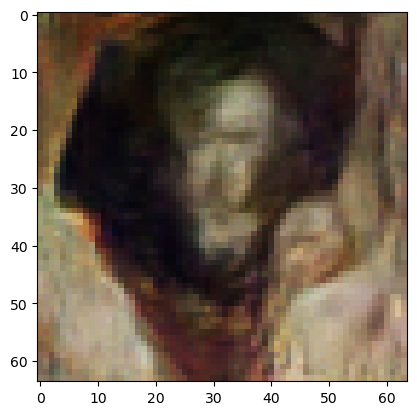

In [25]:
model = torch.load('./models_weights/Generator_saved.pth', map_location='cpu')
model.eval()
img = (((model((torch.rand(1,100) - 0.5) / 0.5)[0] + 1) / 2).clamp(0, 1)).detach().numpy().transpose(1, 2, 0)
plt.imshow(img)

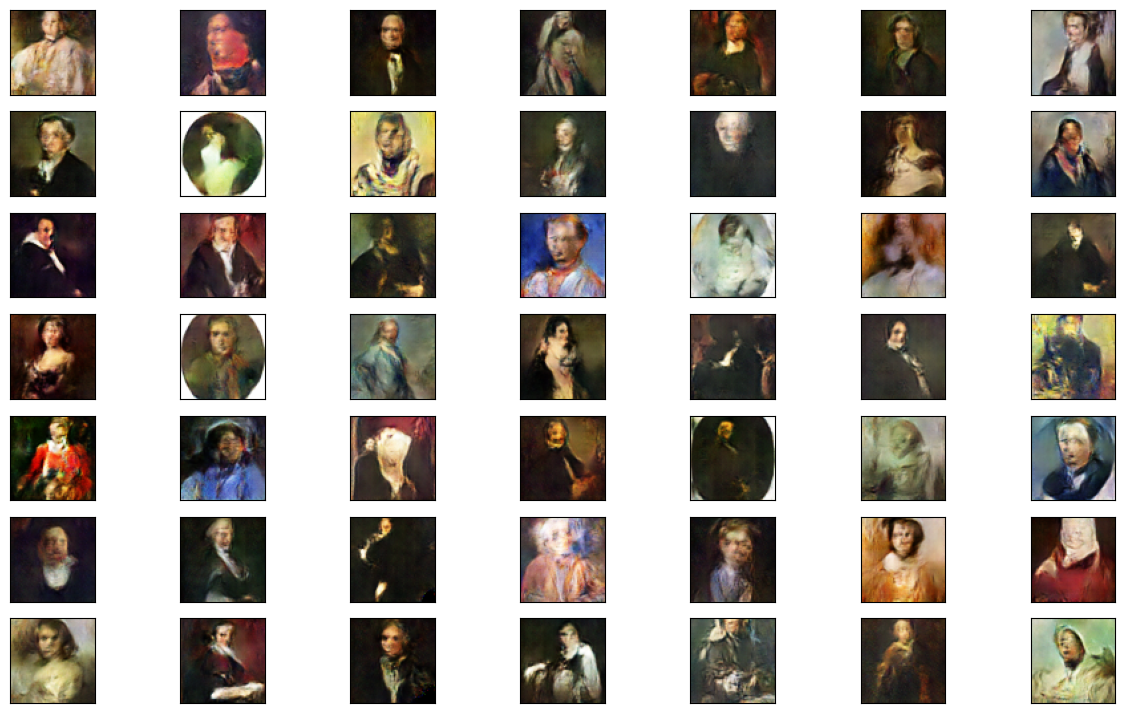

In [29]:
fig, axes = plt.subplots(nrows=7, ncols=7, figsize=(15, 9),  #Размер вывода
                         subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes):
    for count in range(7):
        img = (((model((torch.rand(1,100) - 0.5) / 0.5)[0] + 1) / 2).clamp(0, 1)).detach().numpy().transpose(1, 2, 0)
        ax[count].imshow(img)

In [936]:
randoms = (torch.rand(1,100))
print(model(randoms)[0])

tensor([[[-0.7912, -0.7338, -0.7550,  ..., -0.8461, -0.8840, -0.8024],
         [-0.7411, -0.7105, -0.6695,  ..., -0.8458, -0.8429, -0.7800],
         [-0.7576, -0.7292, -0.7914,  ..., -0.8260, -0.8813, -0.8261],
         ...,
         [-0.5487, -0.5156, -0.5318,  ..., -0.7527, -0.7717, -0.7234],
         [-0.5448, -0.5216, -0.5426,  ..., -0.7270, -0.7798, -0.6411],
         [-0.4102, -0.4068, -0.3491,  ..., -0.7350, -0.7384, -0.6279]],

        [[-0.8363, -0.7763, -0.7807,  ..., -0.8547, -0.8750, -0.8454],
         [-0.7630, -0.7419, -0.7075,  ..., -0.8089, -0.7974, -0.7785],
         [-0.7638, -0.7263, -0.7739,  ..., -0.7794, -0.8532, -0.8296],
         ...,
         [-0.6613, -0.6132, -0.6521,  ..., -0.7617, -0.7573, -0.7357],
         [-0.6244, -0.5704, -0.5931,  ..., -0.7159, -0.7678, -0.6470],
         [-0.4801, -0.4494, -0.4620,  ..., -0.7128, -0.7504, -0.6978]],

        [[-0.8716, -0.8469, -0.8547,  ..., -0.8629, -0.9094, -0.8985],
         [-0.8311, -0.8273, -0.8037,  ..., -0

In [747]:
print(((model(randoms)+ 1) / 2).clamp(0, 1))

tensor([[[[0.0800, 0.0851, 0.0805,  ..., 0.1288, 0.0853, 0.0899],
          [0.0832, 0.1345, 0.1191,  ..., 0.1912, 0.1243, 0.0965],
          [0.0547, 0.0839, 0.0854,  ..., 0.1924, 0.1338, 0.1173],
          ...,
          [0.0334, 0.0445, 0.0268,  ..., 0.2108, 0.1009, 0.1318],
          [0.0348, 0.0504, 0.0379,  ..., 0.1376, 0.0963, 0.1105],
          [0.0517, 0.0686, 0.0713,  ..., 0.1382, 0.1140, 0.1996]],

         [[0.0847, 0.0993, 0.0862,  ..., 0.1133, 0.0955, 0.0800],
          [0.0682, 0.1040, 0.0687,  ..., 0.1135, 0.0803, 0.0636],
          [0.0715, 0.1177, 0.0767,  ..., 0.1626, 0.1030, 0.0949],
          ...,
          [0.0452, 0.0155, 0.0175,  ..., 0.1802, 0.1377, 0.0935],
          [0.0718, 0.0788, 0.0288,  ..., 0.1725, 0.1088, 0.1242],
          [0.0570, 0.0356, 0.0401,  ..., 0.0897, 0.0845, 0.1585]],

         [[0.0499, 0.0424, 0.0506,  ..., 0.0382, 0.0311, 0.0334],
          [0.0503, 0.0710, 0.0682,  ..., 0.0661, 0.0398, 0.0347],
          [0.0555, 0.0436, 0.0879,  ..., 0

In [748]:
( model((torch.rand(1,100) - 0.5) / 0.5)[0] + 1) / 2).clamp(0, 1)).detach().numpy().transpose(1, 2, 0)

SyntaxError: unmatched ')' (3749642886.py, line 1)

In [122]:
transform = transforms.Compose([transforms.Resize(64),
                                transforms.CenterCrop(64),
                                transforms.ToTensor(),
                                #transforms.Grayscale(num_output_channels=1),
                                transforms.Normalize(mean=0.5, std=0.5),
                                ])
y = datasets.ImageFolder('./data/Portraits/', transform=transform)
y_dataloader = torch.utils.data.DataLoader(y,
                                           batch_size=64,
                                           shuffle=False)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


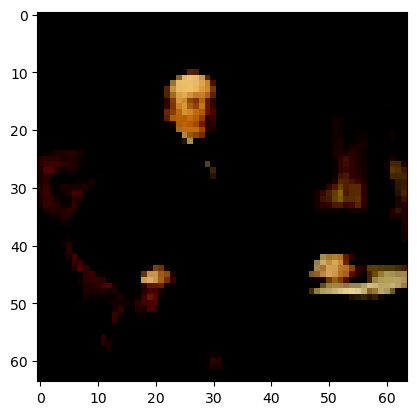

In [214]:
y_test = next(iter(y_dataloader))[0][0]
plt.imshow(y_test.numpy().transpose(1, 2, 0))

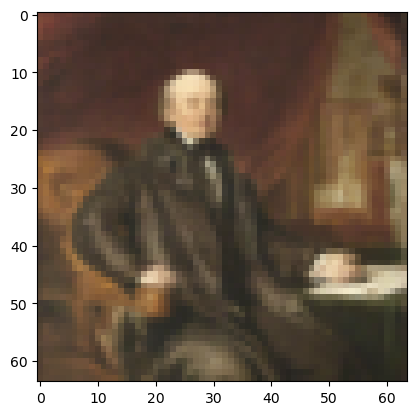

In [215]:
plt.imshow(((y_test + 1) / 2).clamp(0,1).numpy().transpose(1, 2, 0))